In [ ]:
%pip install earthengine-api --upgrade
%pip install geemap

In [1]:
import ee
# # If you are running this notebook for the first time, you need to activate the command below for the authentication flow:
#ee.Authenticate()

In [2]:
try:
    # Initialize the library.
    ee.Initialize()
    print('Google Earth Engine has initialized successfully!')
except ee.EEException as e:
    print('Google Earth Engine has failed to initialize!')
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

Google Earth Engine has initialized successfully!


(373, 531, 3)
1
2
3


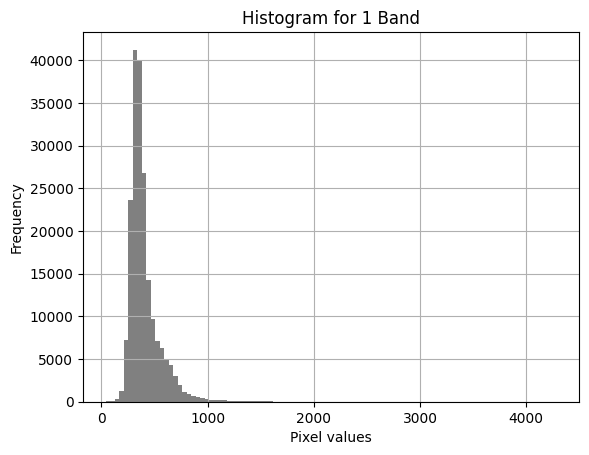

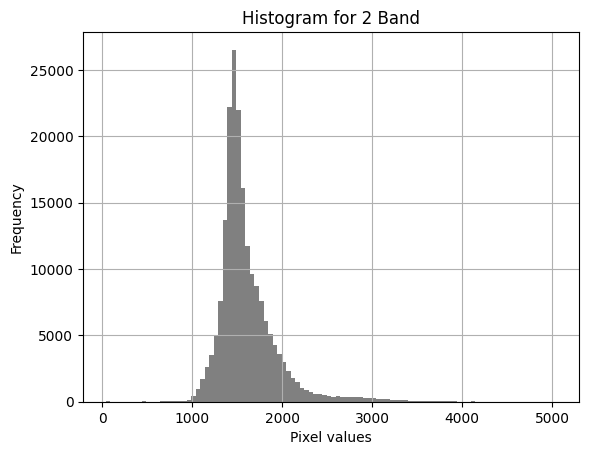

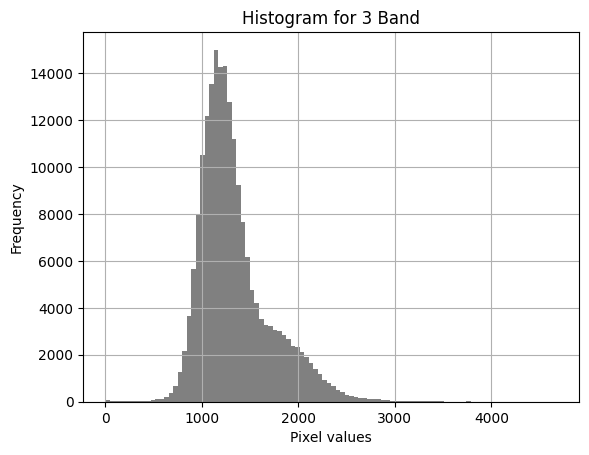

In [8]:
import ee
import geemap
import numpy as np
import matplotlib.pyplot as plt

img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810').select(['B4', 'B5', 'B6'])

aoi = ee.Geometry.Polygon(
    [[[-110.8, 44.7], [-110.8, 44.6], [-110.6, 44.6], [-110.6, 44.7]]], None, False
)

rgb_img = geemap.ee_to_numpy(img, region=aoi)
print(rgb_img.shape)

count = 0
for i in range(rgb_img.shape[2]):  # rgb_img.shape[2] is the number of bands (typically 3 for RGB)
    band_data = rgb_img[:, :, i]  # Extract the ith band
    # Perform operations on band_data
    count += 1 
    print(count)
    # Plotting the histogram
    plt.figure()
    plt.hist(band_data.flatten(), bins=100, color='gray')
    plt.title(f'Histogram for {count} Band')
    plt.xlabel('Pixel values')
    plt.ylabel('Frequency')
    plt.grid(True)

(182, 227, 16)


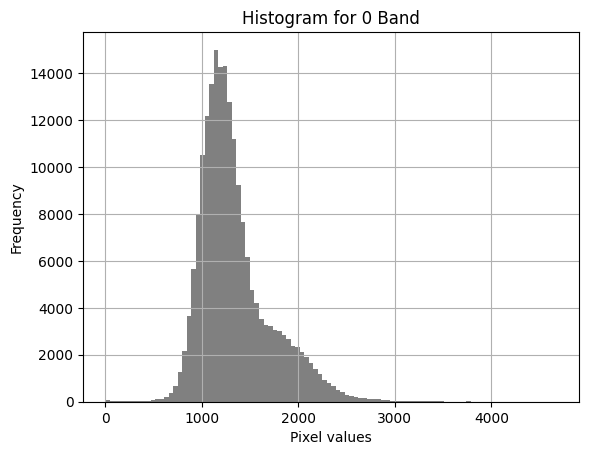

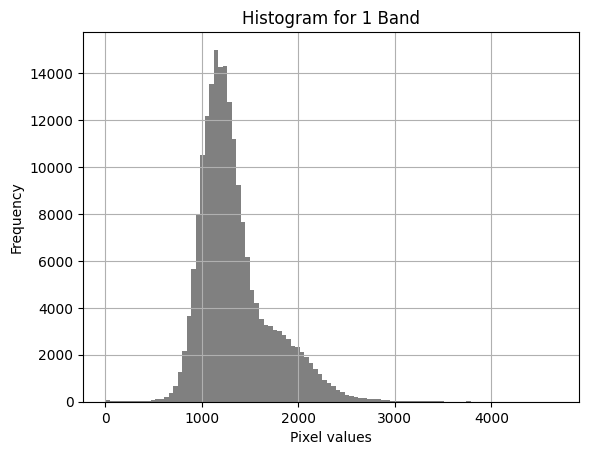

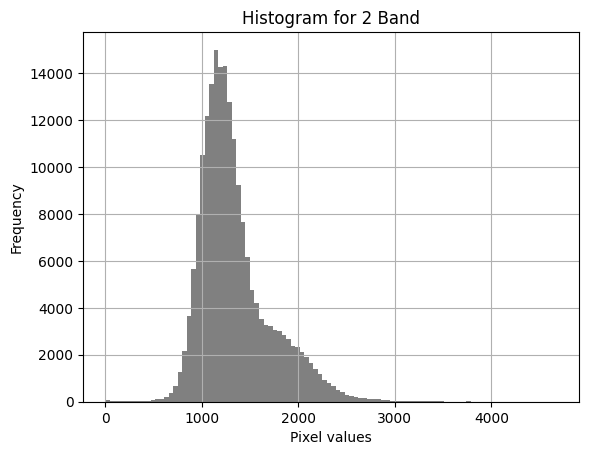

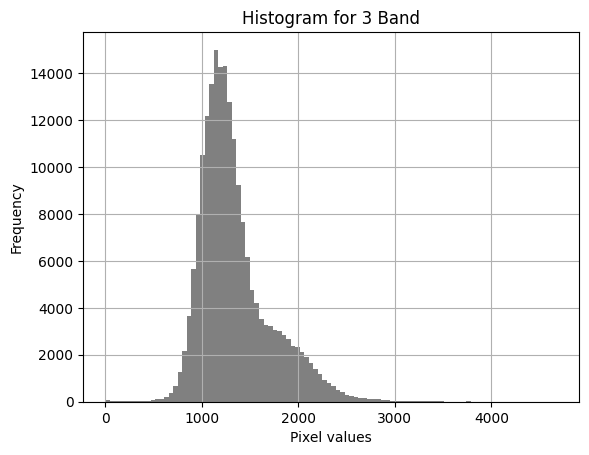

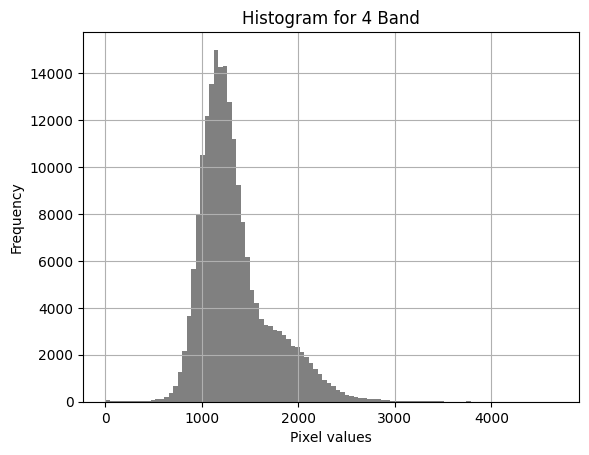

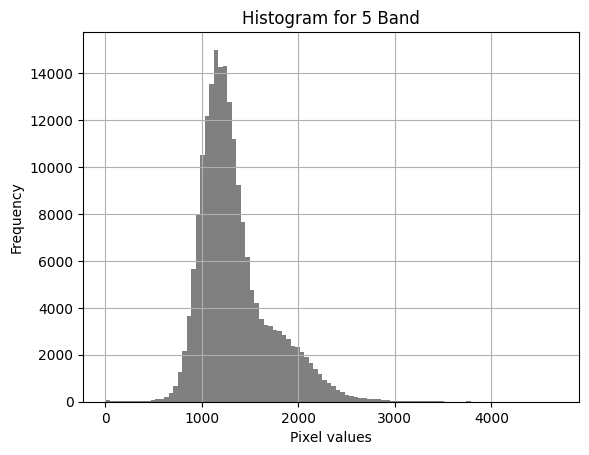

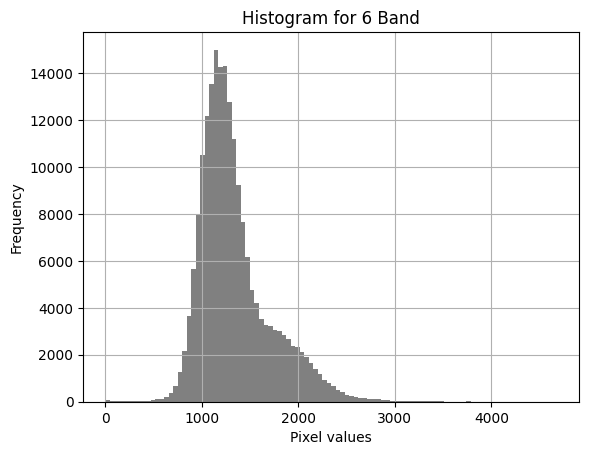

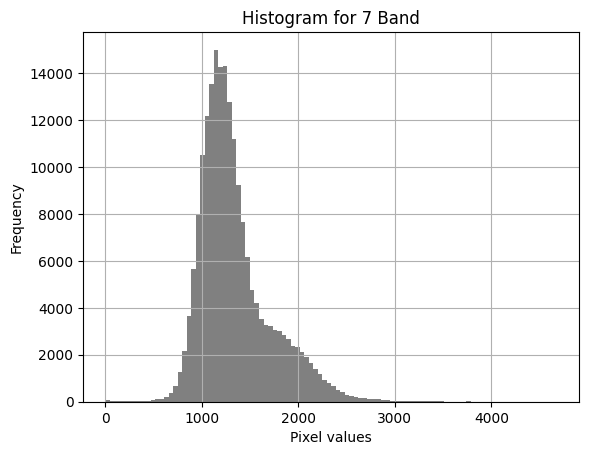

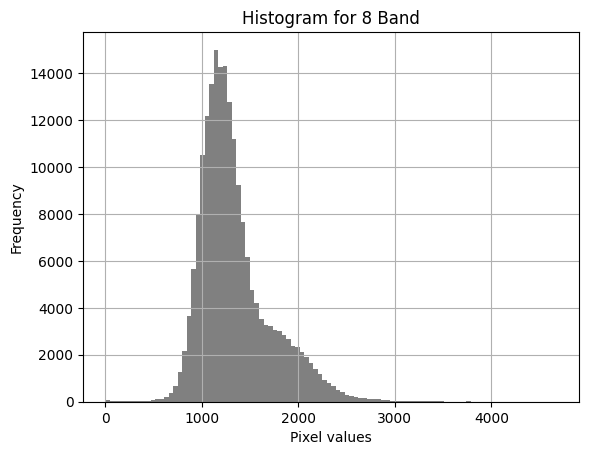

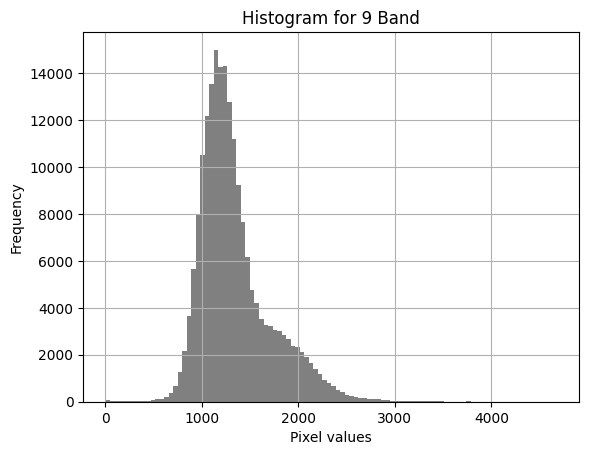

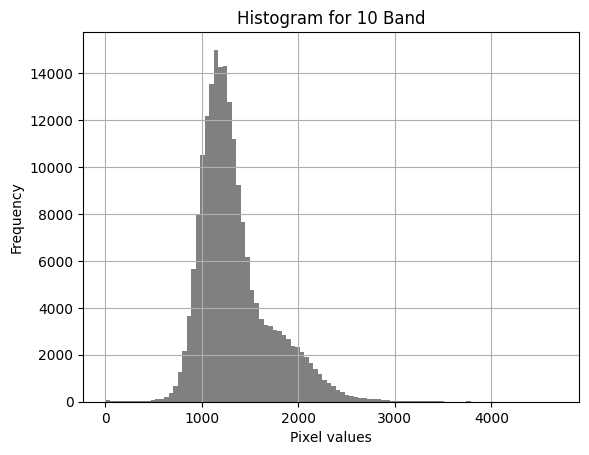

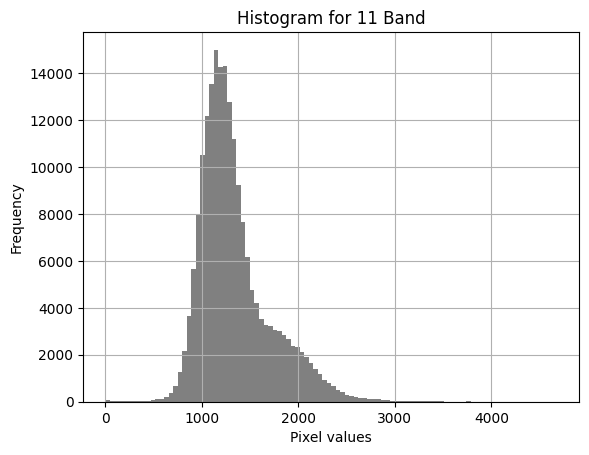

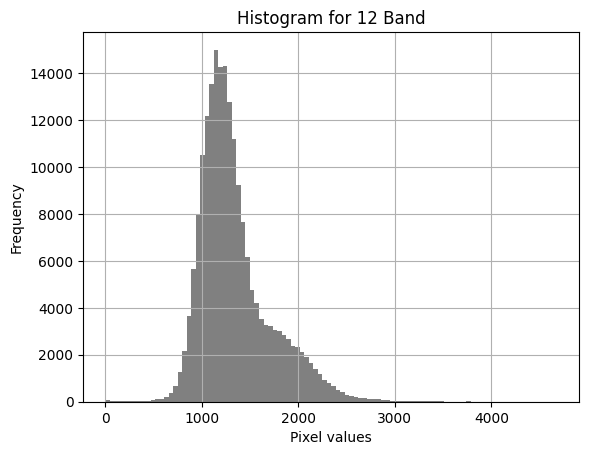

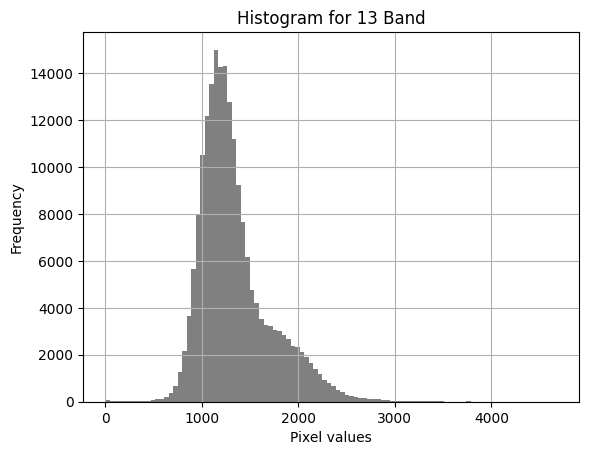

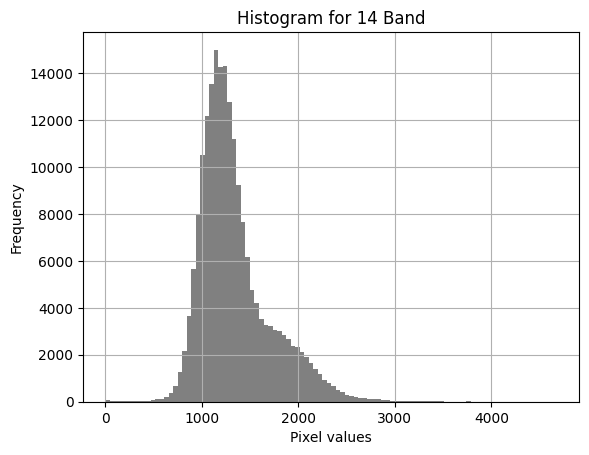

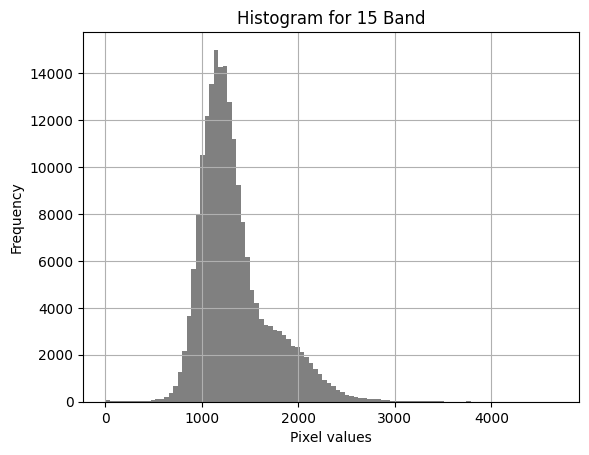

In [11]:
#same as above, but now with an interactive map and hopefully correct hists and images
import ee
import geemap
import numpy as np
import matplotlib.pyplot as plt


#ee auth stuff goes above

#hard coded cords
Enschede = [[[6.795044, 52.175827], [6.795044, 52.267317], [6.985588, 52.267317], [6.985588, 52.175827], [6.795044, 52.175827]]]

#img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810').select(['B4', 'B5', 'B6'])

# Earth Engine query using the coordinates
collection = ee.ImageCollection('COPERNICUS/S2_HARMONIZED') \
    .filterBounds(ee.Geometry.Polygon(Enschede)) \
    .sort("CLOUD_COVERAGE_ASSESSMENT") \
    .first()
    #.filterDate('2022-06-01', '2022-08-30') \


aoi = ee.Geometry.Polygon(Enschede, None, False) #cords to polygon casting

#get an img from the collection
first = collection.first() #mean or median

rgb_img = geemap.ee_to_numpy(first, region=aoi) #waarom hier weer een region in moet idk
print(rgb_img.shape)

for i in range(rgb_img.shape[2]):
        # Plotting the histogram
        plt.figure()
        plt.hist(band_data.flatten(), bins=100, color='gray')
        plt.title(f'Histogram for {i+1} Band') #remove line if broken
        plt.xlabel('Pixel values')
        plt.ylabel('Frequency')
        plt.grid(True)

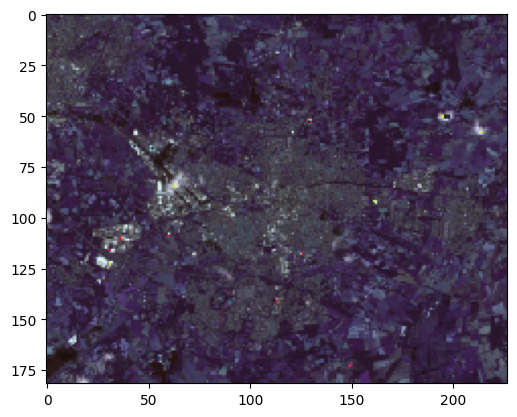

In [21]:
#render the above img in rgb with full range of 8 bit color
# Scale the data to [0, 255] to show as an RGB image.
# Adapted from https://bit.ly/2XlmQY8. Credits to Justin Braaten
bands = rgb_img.shape[2]
rgb_img_test = (255 * ((rgb_img[:, :, 2:5] - 100) / 3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()

In [ ]:
#alternative manier om 1 img uit de collectie te halen aan de hand van een soort medium / avg? wat doet dit en wat voor andere manieren bestaan er?
# img2 = collection.median().clip(ee.Geometry.Polygon(areas_of_interest[input_area_name]))
# Map2.addLayer(img2, vis_param, "MedianImage", True) 